# The math behind the photo enhancements.

## The idea here is to _"reverse engineer"_ a GIMP filter, used to give a photo a certain "vintage" look. 

First let's import the necessary tools: skimage.io, matplotlib.pyplot and NumPy:

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np


Let's load an image first. 


In [4]:
image = io.imread('./my_notebooks/riogrande.jpg') #load an image as Numpy array

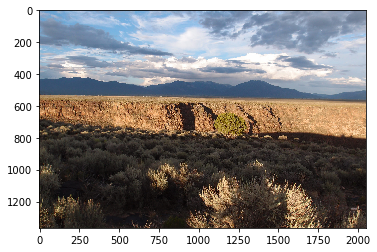

In [7]:
plt.imshow(image) # let's see what it is


Let's see how the three color channels look in this particular photo. In order to do that, we can write
a function that will take the image and display histograms of all three channels: <font color=red>red</font>, <font color=green>green</font> and <font color=blue>blue</font>.


In [3]:
def channel_splitter(image):
    '''fast numpy-based version, takes an image imported as numpy array and returns a graph 
    with three channels histograms'''
    xaxis = np.arange(256) # create the x-axis between 0 and 255
    fig, ax = plt.subplots() # initiate plots
    for number, color in enumerate(['red', 'green', 'blue']): 
        # creates pairs of channel numbers (0-2) and color names
        freqcount, _ = np.histogram(image[:,:,number], bins = np.arange(257)) 
        # gets the counts for each bin; must be one more bin as np.histogram returns bin edges
        # that is pixels with value 255 are in the bin 255-256
        ax.fill_between(xaxis, 0, freqcount, facecolor = color, alpha = 0.3) 
        #makes a graph with the correct color for each channel, transparency set to 30%
    plt.show()
        

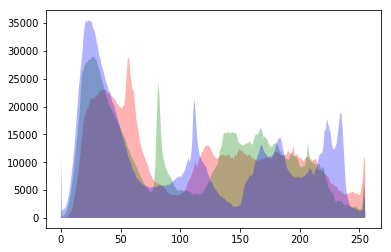

In [8]:
channel_splitter(image) #use the channel_splitter function on the image we loaded

We can see that this image has a lot of shadows, but they're not pure greys/blacks, they are shifted towards blue and green. There are also some peaks of reds, greens and blues here and there. 

Let's load a second image, a processed version of the original.

In [9]:
image2 = io.imread('./my_notebooks/riogrande_agfa.jpg') #load the second image, processed with a filter

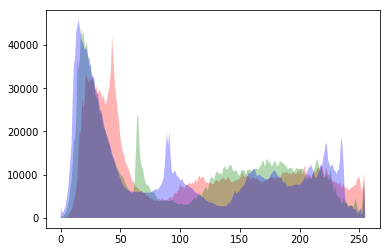

In [10]:
channel_splitter(image2)

Without looking at the processed version we can tell that something must have changed here. 
The peaks on the left are taller and sharper: it would indicate deeper shadows with more abrupt tonal transitions. The shadows are also greener. 
Let's look at each channel, comparing the two images. To do this, let's write another function.

In [27]:
def channel_cross_analysis(image1, image2):
    '''takes each color channel from both images and shows two overlaid histograms'''
    xaxis = np.arange(256) # create the x-axis between 0 and 255
    for number, color in enumerate(['red', 'green', 'blue']): 
            fig, ax = plt.subplots() # initiate plots    
            freqcount1, _ = np.histogram(image1[:,:,number], bins = np.arange(257))
            freqcount2, _ = np.histogram(image2[:,:,number], bins = np.arange(257))
            ax.fill_between(xaxis, 0, freqcount1, facecolor = 'gray', alpha = 0.4) # gray is the original
            ax.fill_between(xaxis, 0, freqcount2, facecolor = (color), alpha = 0.4) 
            plt.title("{} channel".format(color))
            plt.show()
        

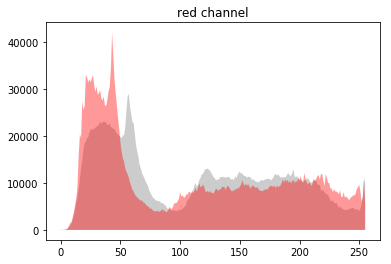

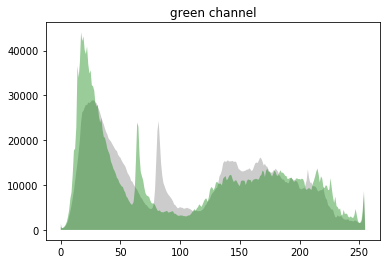

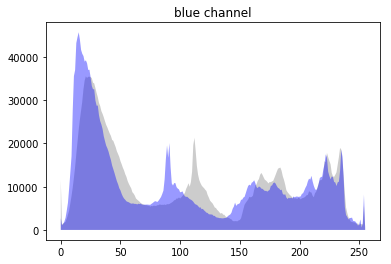

In [28]:
channel_cross_analysis(image, image2) #let's see how the three channels differ between the two images